# Regression EDA

In [275]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [276]:
# import data and show 10 entries
data = pd.read_csv("data_salaries.csv")
data_graphing = data
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [277]:
# show size and shape
print(data.size)
print(data.shape)

41305
(3755, 11)


In [278]:
# Show all data types
types = data.dtypes
print(types)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [279]:
# Show means and standard deviations of numeric types
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64


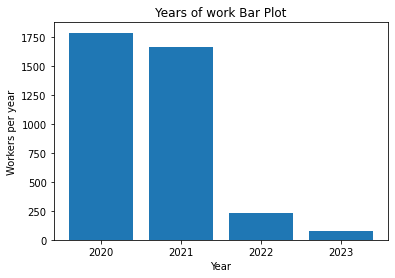

In [280]:
# Plotting work year with bar plot.
fig, ax = plt.subplots()
print(data['work_year'].value_counts(ascending=False))
labels = ['2020','2021','2022','2023']
ax.bar(labels,data['work_year'].value_counts(ascending=False))
ax.set_title('Years of work Bar Plot')
plt.xlabel('Year')
ax.set_ylabel('Workers per year')
plt.show()

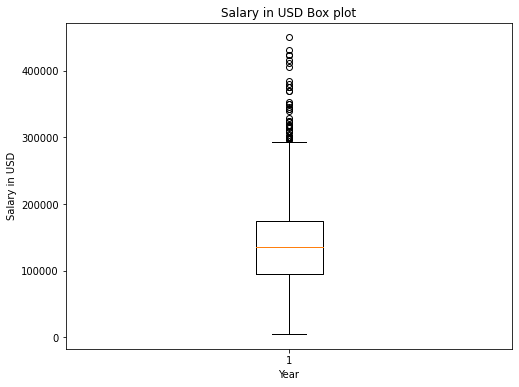

In [281]:
# plotting salary-usd in box and whisker
# note we did not use the normal salary because salary-usd is standardized to USD, 
# we will also clean this column out in the cleaning section.

plt.figure(figsize=(8, 6))
plt.boxplot(data['salary_in_usd'])
plt.title('Salary in USD Box plot')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.show()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64


<Figure size 576x432 with 0 Axes>

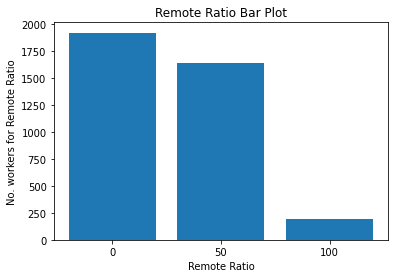

In [282]:
# plotting remote ratio in Bar Plot.
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
print(data['remote_ratio'].value_counts(ascending=False))
labels = ['0','50','100']
ax.bar(labels,data['remote_ratio'].value_counts(ascending=False))
ax.set_xlabel('Remote Ratio')
ax.set_ylabel('No. workers for Remote Ratio')
ax.set_title('Remote Ratio Bar Plot')
plt.show()

Converting the objects into numerical

In [283]:
# Show the Value counts for object types
object_columns = data.select_dtypes(include=['object'])

for col in object_columns:
    print("\nColumn Name:", col)
    print(data[col].value_counts())


Column Name: experience_level
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

Column Name: employment_type
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

Column Name: job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

Column Name: salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD   

In [284]:
# We will apply ordinal encoding to the columns experience_level and company_size 
# due to them having an appropriate ordering.

# Ordering in Experience is EN - Entry, MI - Middle, SE - Senior, EX - Executive
exp_map = {'EN':0,'MI':1,'SE':2,'EX':3}
size_map = {'S':0,'M':1,'L':2}

data['experience_level'] = data['experience_level'].replace(exp_map)
data['company_size'] = data['company_size'].replace(size_map)

In [285]:
# We will apply one-hot encoding to employment type as it does not have too many value types.
data = pd.get_dummies(data, columns=['employment_type'])

print(data_encoded.dtypes)

work_year              int64
experience_level       int64
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size           int64
employment_type_CT     uint8
employment_type_FL     uint8
employment_type_FT     uint8
employment_type_PT     uint8
dtype: object


In [286]:
# we will apply one-hot encoding to these by taking the top 9 value types then lumping the rest into Other category
# Note: Salary_currency and company_location will be getting cleaned out.

# get top 9 job titles and residencies
job_top_nine = data['job_title'].value_counts().index[:9].tolist()
residency_top_nine = data['employee_residence'].value_counts().index[:9].tolist()


# Replace other categories in job titles and residencies
data['job_title'] = data['job_title'].apply(lambda x: x if x in job_top_nine else 'Other')
data['employee_residence'] = data['employee_residence'].apply(lambda x: x if x in residency_top_nine else 'Other')

# Perform one hot encoding for both columns
data = pd.get_dummies(data, columns=['job_title'])
data = pd.get_dummies(data, columns=['employee_residence'])

# check correct types
print(data.dtypes)

work_year                               int64
experience_level                        int64
salary                                  int64
salary_currency                        object
salary_in_usd                           int64
remote_ratio                            int64
company_location                       object
company_size                            int64
employment_type_CT                      uint8
employment_type_FL                      uint8
employment_type_FT                      uint8
employment_type_PT                      uint8
job_title_Analytics Engineer            uint8
job_title_Applied Scientist             uint8
job_title_Data Analyst                  uint8
job_title_Data Architect                uint8
job_title_Data Engineer                 uint8
job_title_Data Science Manager          uint8
job_title_Data Scientist                uint8
job_title_Machine Learning Engineer     uint8
job_title_Other                         uint8
job_title_Research Scientist      

In [287]:
print(data)

      work_year  experience_level   salary salary_currency  salary_in_usd  \
0          2023                 2    80000             EUR          85847   
1          2023                 1    30000             USD          30000   
2          2023                 1    25500             USD          25500   
3          2023                 2   175000             USD         175000   
4          2023                 2   120000             USD         120000   
...         ...               ...      ...             ...            ...   
3750       2020                 2   412000             USD         412000   
3751       2021                 1   151000             USD         151000   
3752       2020                 0   105000             USD         105000   
3753       2020                 0   100000             USD         100000   
3754       2021                 2  7000000             INR          94665   

      remote_ratio company_location  company_size  employment_type_CT  \
0 

## 2. Visualise data

We will visualise the columns that were converted into numerical. Experience Level, Company Size, Employment Type, Job Title, Employee Residence, Company Location.

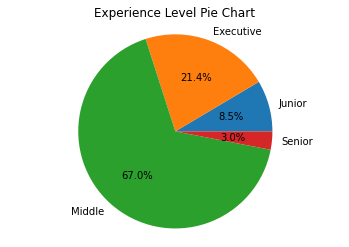

In [288]:
# Plotting Experience Level into Pie Plot.

counts = data['experience_level'].value_counts().sort_index()
labels = ['Junior','Executive','Middle','Senior']

plt.pie(counts, labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Experience Level Pie Chart')
plt.show()

1    3153
2     454
0     148
Name: company_size, dtype: int64


<Figure size 576x432 with 0 Axes>

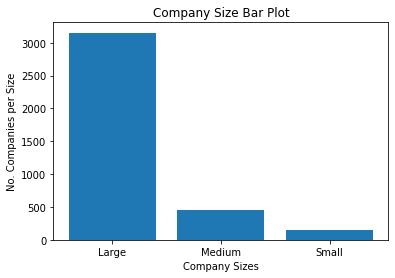

In [289]:
# Plotting Company Size into Bar Plot.

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
print(data['company_size'].value_counts(ascending=False))
labels = ['Large','Medium','Small']
ax.bar(labels,data['company_size'].value_counts(ascending=False))
ax.set_xlabel('Company Sizes')
ax.set_ylabel('No. Companies per Size')
ax.set_title('Company Size Bar Plot')
plt.show()

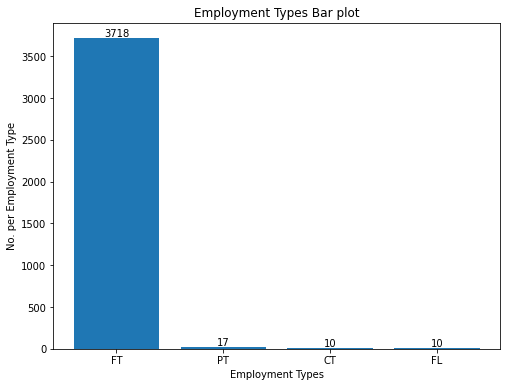

In [290]:
# Plotting Employment Type into a bar plot,

employment_type = data_graphing['employment_type'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(employment_type.index, employment_type.values)
ax.bar_label(bars)


ax.set_xlabel('Employment Types')
ax.set_ylabel('No. per Employment Type')
ax.set_title('Employment Types Bar plot')
plt.show()


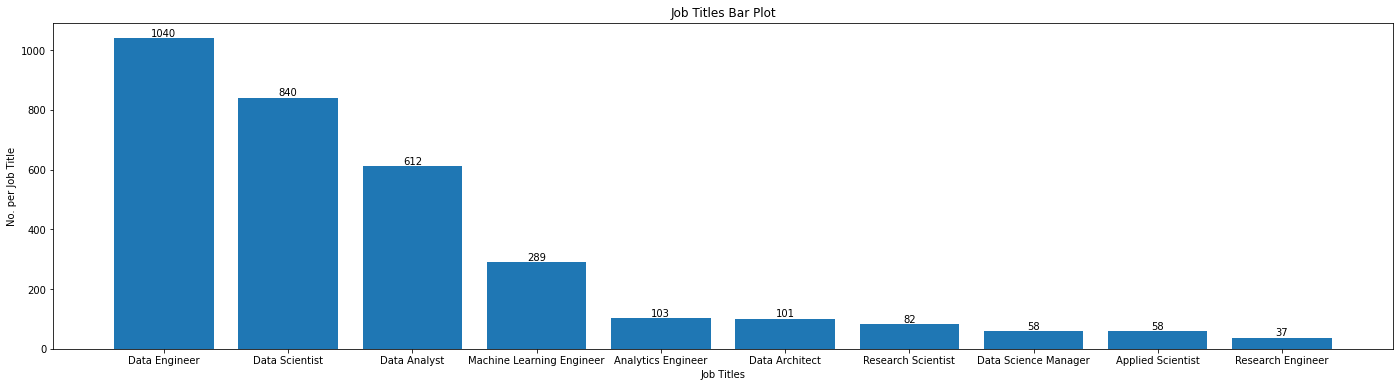

In [291]:
# Plotting Job Title into bar plot, top 10


job_title = data_graphing['job_title'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(24, 6))

bars = ax.bar(job_title.index, job_title.values)
ax.bar_label(bars)


ax.set_xlabel('Job Titles')
ax.set_ylabel('No. per Job Title')
ax.set_title('Job Titles Bar Plot')
plt.show()


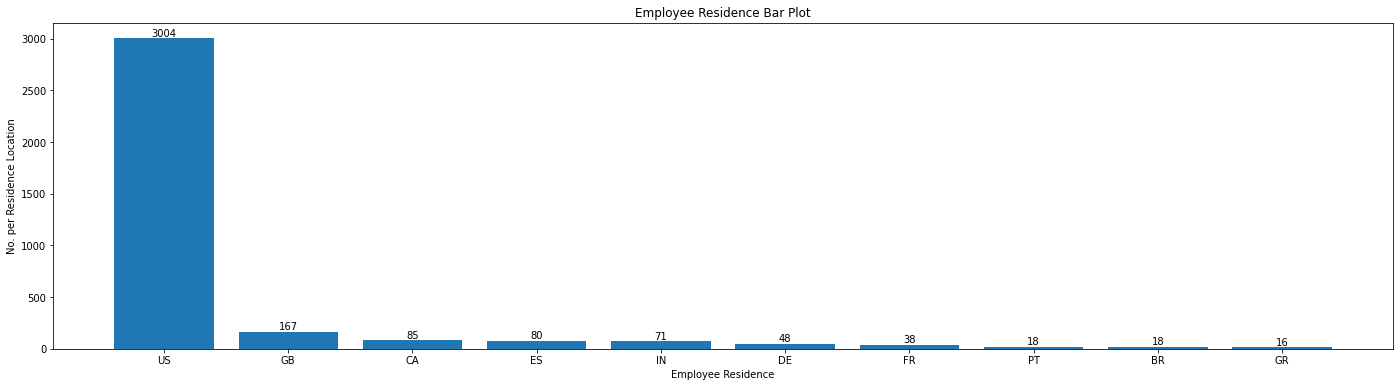

In [292]:
# Plotting Employee Residence into bar plot, top 10
job_title = data_graphing['employee_residence'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(24, 6))

bars = ax.bar(job_title.index, job_title.values)
ax.bar_label(bars)


ax.set_xlabel('Employee Residence')
ax.set_ylabel('No. per Residence Location')
ax.set_title('Employee Residence Bar Plot')
plt.show()

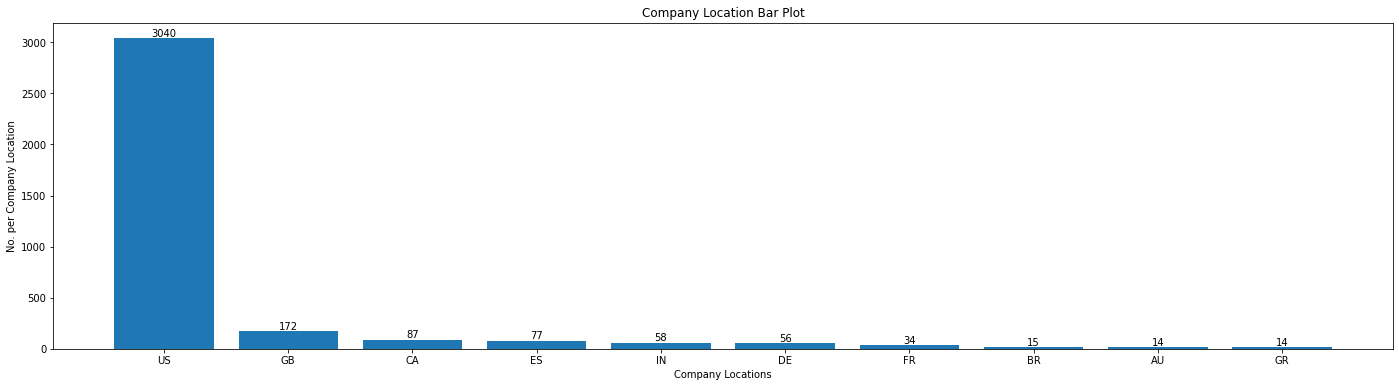

In [293]:
# Plotting Company Location into bar plot, top 10

job_title = data_graphing['company_location'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(24, 6))

bars = ax.bar(job_title.index, job_title.values)
ax.bar_label(bars)


ax.set_xlabel('Company Locations')
ax.set_ylabel('No. per Company Location')
ax.set_title('Company Location Bar Plot')
plt.show()

After both visualisations for the data, some clear majorities for this data set are the United States for the locations, Full time workers in large companies of salary data taken from the year 2020 and 2021.

## 3. Clean Data

For this step we will Perform Cleaning on the data; notably we will remove the column salary, and the column for Salary currency these two columns were not useful to the data given that everything was being standardized into USD. The column Company_location will also be removed as it is very similar to employee_residence, I have chosen to remove it over Employee_Residence as it is an employee based factor.

In [294]:
print(data.head)

<bound method NDFrame.head of       work_year  experience_level   salary salary_currency  salary_in_usd  \
0          2023                 2    80000             EUR          85847   
1          2023                 1    30000             USD          30000   
2          2023                 1    25500             USD          25500   
3          2023                 2   175000             USD         175000   
4          2023                 2   120000             USD         120000   
...         ...               ...      ...             ...            ...   
3750       2020                 2   412000             USD         412000   
3751       2021                 1   151000             USD         151000   
3752       2020                 0   105000             USD         105000   
3753       2020                 0   100000             USD         100000   
3754       2021                 2  7000000             INR          94665   

      remote_ratio company_location  company_

In [295]:
# Remove the columns for salary, salary currency, company location
data = data.drop(['salary', 'salary_currency','company_location'], axis=1)

In [296]:
# Check removed
print(data.dtypes)

work_year                              int64
experience_level                       int64
salary_in_usd                          int64
remote_ratio                           int64
company_size                           int64
employment_type_CT                     uint8
employment_type_FL                     uint8
employment_type_FT                     uint8
employment_type_PT                     uint8
job_title_Analytics Engineer           uint8
job_title_Applied Scientist            uint8
job_title_Data Analyst                 uint8
job_title_Data Architect               uint8
job_title_Data Engineer                uint8
job_title_Data Science Manager         uint8
job_title_Data Scientist               uint8
job_title_Machine Learning Engineer    uint8
job_title_Other                        uint8
job_title_Research Scientist           uint8
employee_residence_BR                  uint8
employee_residence_CA                  uint8
employee_residence_DE                  uint8
employee_r

In [297]:
# Dealing with outliers in the dependent variable
# Calculate iqr
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Set lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Remove outliers from salary_in_usd
data = data[(data['salary_in_usd'] >= lower_bound) & (data['salary_in_usd'] <= upper_bound)]

In [298]:
# standardize work year and remote ratio.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['work_year'] = scaler.fit_transform(data['work_year'].values.reshape(-1, 1))
data['remote_ratio'] = scaler.fit_transform(data['remote_ratio'].values.reshape(-1, 1))

In [299]:
# Feature selection by dropping values with less than 0.05 Correlation
select_matrix = data.corr()
correlation_with_target = select_matrix['salary_in_usd'].sort_values(ascending=False)

low_corr_features = correlation_with_target[abs(correlation_with_target) < 0.05].index
data.drop(low_corr_features, axis=1, inplace=True)

## 4. Identify correlated variables

                                     work_year  experience_level  \
work_year                             1.000000          0.195877   
experience_level                      0.195877          1.000000   
salary_in_usd                         0.250661          0.451925   
remote_ratio                         -0.236067         -0.047901   
employment_type_FL                   -0.050766         -0.041396   
employment_type_FT                    0.113448          0.146431   
employment_type_PT                   -0.094676         -0.146835   
job_title_Analytics Engineer          0.018351          0.073702   
job_title_Applied Scientist           0.053637          0.026205   
job_title_Data Analyst                0.044569         -0.074283   
job_title_Data Architect              0.027186          0.076498   
job_title_Data Engineer               0.037884          0.068925   
job_title_Data Science Manager       -0.033531          0.053088   
job_title_Machine Learning Engineer   0.030638  

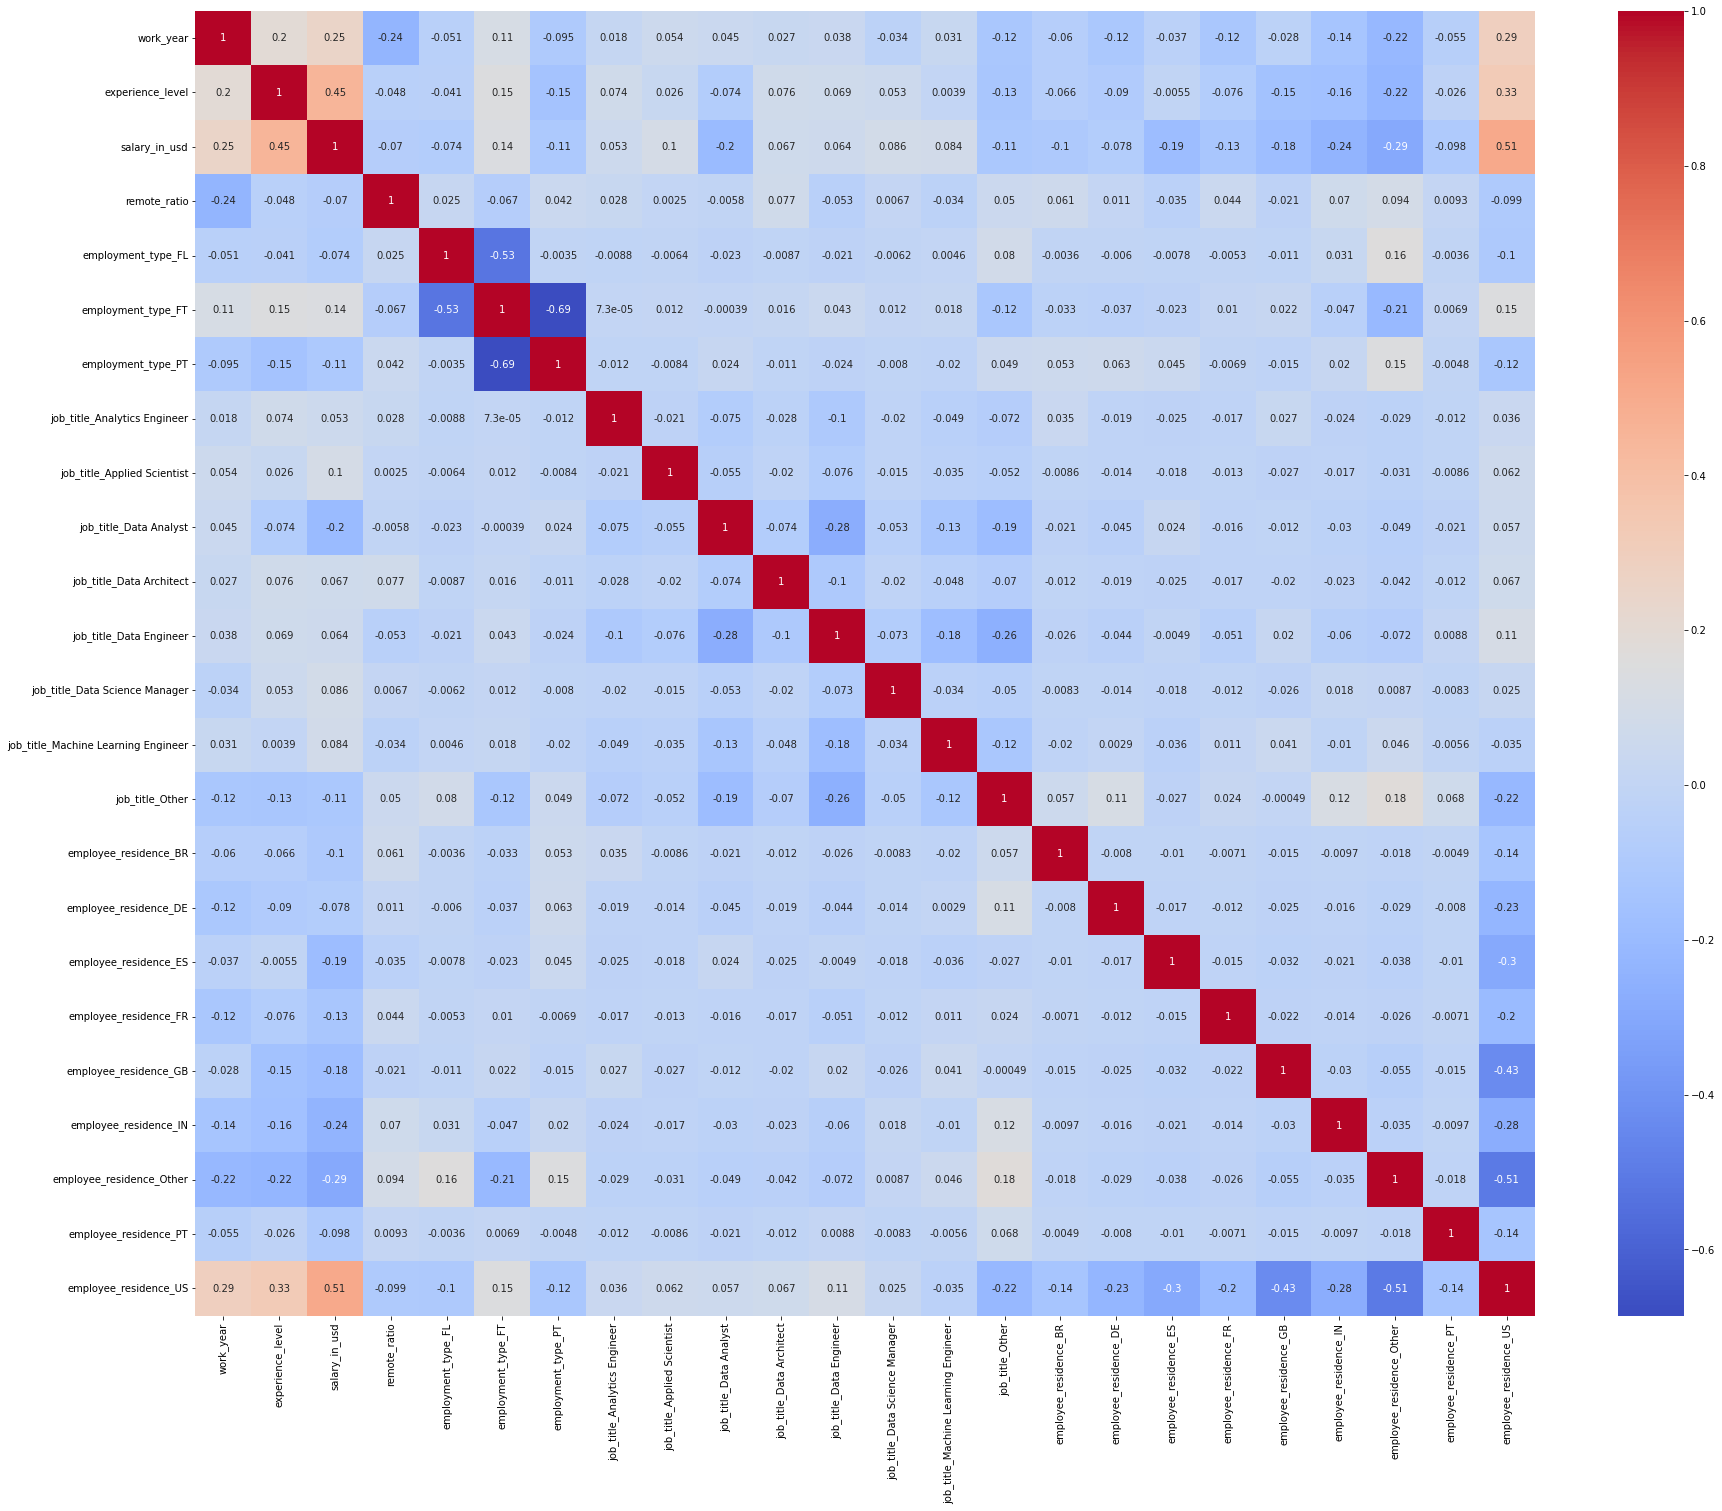

In [300]:
# Create correlation matrix and plot as heatmap.
corr_matrix = data.corr()
print(corr_matrix)

plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

We can see some strong correlations between Salary, being a higher experience level and location.
The strong negative correlations among the employment types are an artifact of each of them being mutually exclusive.

## 5. Summary

In Step 1 we plotted the already numeric columns, work year, salary in usd and remote ratio and tried to understand them. The data for work year indicated that most of salary data originated from the years 2020 and 2021, Remote ratio would become an impact for salary in these two years with it steadily decreasing as the pandemic measures loosened.

When transforming the non numerical types I chose ordinal encoding for experience level and company size as the data values came in a scale that could be should be represented when training the model.

One-hot encoding was used for employement type as it was non-ordinal and would not introduce too many new columns to the data set.

job title and location and location were cut down to the top 9 and other values before one hot encoding them otherwise too many new columns would be introduced by the number of different possible values.

Step 2 was the visualization of the converted non-numerical data types
This section showed that Full time american workers comprised of most of the data set that and medium to intermediate work experience. 

Step 3 The data was cleaned of columns that were deemed unecessary, Salary and salary currency were removed as we would use the already standardized column Salary_usd for our dependent variable. Company_location was removed as it was very similar to employee_residence.
Outliers were dealt with inside the dependent variable as there were some values that may have been errors as the usual salaries were around the 5 to 6 figure range but some were within 4 figures
The work year and remote_ratio were standardized to give a more consistent scale for the features when the linear regression model is trained.
Lastly we selected our features to remove those with less than 0.05 correlation with salary_in_usd in order to focus more on correlated features and to simplify the number of columns present.

Step 4 was the correlation matrix between the variables, we saw strong positive correlations between salary, high experience and location in us. This could be biased towards the fact that the majority of workers sampled were american workers.

Next we will move on to performing linear regression on this data set

In [301]:
# Export Csv
data.to_csv('salaries_processed.csv', index=False)
